In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Save Kyoto_Gases data (2020-2100), consider the case of C1-C8 for simplicity.
Kyoto_Gases = pd.read_csv('Kyoto Gases.csv')
X_Emissions = Kyoto_Gases
X_Emissions = X_Emissions[X_Emissions['Category'].isin(['C1','C2','C3','C4','C5','C6','C7','C8'])]
X_Emissions.reset_index(drop=True,inplace=True)
mapping = {'C1':1,'C2':2,'C3':3,'C4':4,'C5':5,'C6':6,'C7':7,'C8':8}
X_Emissions['Category'].replace(mapping,inplace=True)
X_Emissions.drop(columns=['Category_name'],inplace=True)

C:\Users\l1137\AppData\Local\Temp\ipykernel_55000\3013020388.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Emissions['Category'].replace(mapping,inplace=True)
C:\Users\l1137\AppData\Local\Temp\ipykernel_55000\3013020388.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Emissions.drop(columns=['Category_name'],inplace=True)


In [3]:
#Merge models according to a uniform standard
MESSAGEix = list(set([i for i in X_Emissions['Model'] if  'MESSAGE' in i]))
WITCH = list(set([i for i in X_Emissions['Model'] if  'WITCH' in i]))
COFFEE = ['COFFEE 1.1']
REMIND = list(set([i for i in X_Emissions['Model'] if  'REM' in i]))
TIA = list(set([i for i in X_Emissions['Model'] if  'TIAM-ECN' in i]))
POL = list(set([i for i in X_Emissions['Model'] if  'POL' in i]))
AIM = list(set([i for i in X_Emissions['Model'] if  'AIM' in i]))
IMA = list(set([i for i in X_Emissions['Model'] if  'IMAGE' in i]))
GCA = list(set([i for i in X_Emissions['Model'] if  'GCA' in i]))

In [4]:
Model = [MESSAGEix,WITCH,COFFEE,REMIND,TIA,POL,AIM,IMA,GCA]
Model_names = ['MESSAGEix','WITCH','COFFEE','REMIND','TIA','POL','AIM','IMA','GCA']
Model_List = []
for i in Model:
    Model_List += i

In [5]:
X_Emissions = X_Emissions[X_Emissions['Model'].isin(Model_List)]

In [6]:
mapping = {j:Model_names[i] for i in range(len(Model)) for j in Model[i]}
X_Emissions['Model'].replace(mapping,inplace=True)
X_Emissions.reset_index(drop=True,inplace=True)

In [7]:
#Load a dataset of individual variables
CarbonSequestration = pd.read_csv('Carbon_Sequestration_CCS_imputed.csv')
FinalEnergy_Gase = pd.read_csv('Final Energy_Gases.csv')
FinalEnergy_Liquid = pd.read_csv('Final Energy_Liquids.csv')
FinalEnergy_Solid = pd.read_csv('Final Energy_Solids.csv')
FinalEnergy = pd.read_csv('Final_Energy_ts_imputed.csv')
PrimaryEnergy_Gas = pd.read_csv('Primary Energy_Gas.csv')
PrimaryEnergy_Oil = pd.read_csv('Primary Energy_Oil.csv')
PrimaryEnergy_Solar = pd.read_csv('Primary Energy_Solar.csv')
PrimaryEnergy_Coal = pd.read_csv('PrimaryEnergy_Coal.csv')
PrimaryEnergy = pd.read_csv('PrimaryEnergy_imputed.csv')
SecondaryEnergy_Gas = pd.read_csv('Secondary Energy_Gases.csv')
SecondaryEnergy_Liquid = pd.read_csv('Secondary Energy_Liquids.csv')
SecondaryEnergy_Electricity = pd.read_csv('SecondaryEnergyElectricity_imputed.csv')

In [8]:
#Get the intersection of the models and scenarios contained in each variable
baseline = X_Emissions[['Model','Scenario']]
Variables = [CarbonSequestration,FinalEnergy,FinalEnergy_Gase,FinalEnergy_Liquid,FinalEnergy_Solid,PrimaryEnergy,PrimaryEnergy_Coal,PrimaryEnergy_Gas,PrimaryEnergy_Oil,PrimaryEnergy_Solar,SecondaryEnergy_Electricity,SecondaryEnergy_Gas,SecondaryEnergy_Liquid]
for i in range(len(Variables)):
    Variables[i]['Model'].replace(mapping,inplace=True)
for variable in Variables:
    baseline = pd.merge(baseline,variable[['Model','Scenario']],on=['Model','Scenario'],how='inner')

In [9]:
for i in range(len(Variables)):
     Variables[i] = pd.merge(baseline,Variables[i],on=['Model','Scenario'],how='inner')

In [10]:
 Features_Sum = np.zeros((996,13))#Feature_Sum:13 Features Accumulation from 2010 to 2100
for i in range(996):
    for j in range(len(Variables)):
        X = Variables[j].iloc[:,2:-2].values
        for k in range(9):
            Features_Sum[i][j] += (X[i][k] + X[i][k+1]) * 5
Features_2010_2030 = np.zeros((996,13))#Feature_2010_2030:13 Features Rate of change 2010-2030
for i in range(996):
    for j in range(len(Variables)):
        X = Variables[j].iloc[:,2:-2].values
        Features_2010_2030[i][j] = (X[i][2] - X[i][0]) / 20
Features_2030_2050 = np.zeros((996,13))#Feature_2030_2050:13 Features Rate of change 2030-2050
for i in range(996):
    for j in range(len(Variables)):
        X = Variables[j].iloc[:,2:-2].values
        Features_2030_2050[i][j] = (X[i][4] - X[i][2]) / 20
Features = np.concatenate((Features_Sum,Features_2010_2030,Features_2030_2050),axis=1)

In [11]:
X_Emissions = pd.merge(X_Emissions,baseline,on = ['Model','Scenario'],how = 'inner')

In [12]:
columns_names1 = ['CarbonSequestration','FinalEnergy','FinalEnergy_Gase','FinalEnergy_Liquid','FinalEnergy_Solid','PrimaryEnergy','PrimaryEnergy_Coal','PrimaryEnergy_Gas','PrimaryEnergy_Oil','PrimaryEnergy_Solar','SecondaryEnergy_Electricity','SecondaryEnergy_Gas','SecondaryEnergy_Liquid']
columns_names2 = [feature + '2010-2030' for feature in columns_names1]
columns_names3 = [feature + '2030-2050' for feature in columns_names1]
columns_names = columns_names1 + columns_names2 + columns_names3
DataSet = pd.DataFrame(Features,columns = columns_names)
DataSet['Category'] = X_Emissions['Category']
DataSet['Model'] = X_Emissions['Model']

In [13]:
#One-hot coding is performed on the model class, and the model is also used as a feature to participate in the training of the random forest model.
one_hot_encoded = pd.get_dummies(DataSet['Model'],prefix='Model',drop_first=True)
DataSet = pd.concat([DataSet.drop('Model', axis=1), one_hot_encoded], axis=1)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
X = DataSet.drop(columns='Category')
y = DataSet['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Create random forest classifier object
classifier = RandomForestClassifier(random_state=5)
parameters_1 = {
    'n_estimators':[10,100,500,1000,3000],
    'max_depth':[5,7,8,10,12,14],
    'min_samples_split':[4,6,8]
}

# GridSearch and Fitting model
grid_search = GridSearchCV(classifier,parameters_1,cv=3,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)
print(f"Best paramters:")
print(grid_search.best_params_)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
Best paramters:
{'max_depth': 14, 'min_samples_split': 6, 'n_estimators': 1000}


In [15]:
rf_classifier = RandomForestClassifier(max_depth=14,min_samples_split=6,n_estimators=1000,random_state=5)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Classification accuracy on training datasets:", accuracy)

Classification accuracy on training datasets: 0.9949748743718593


In [16]:
# Prediction on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate classification accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Classification accuracy on test datasets:", accuracy)

Classification accuracy on test datasets: 0.85


In [17]:
#Importance of Feature
importance = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print(feature_importance_df)
#The importance score of each feature is ranked from largest to smallest

                                 Feature  Importance
6                     PrimaryEnergy_Coal    0.072323
26          CarbonSequestration2030-2050    0.062320
0                    CarbonSequestration    0.057021
8                      PrimaryEnergy_Oil    0.043012
7                      PrimaryEnergy_Gas    0.039755
32           PrimaryEnergy_Coal2030-2050    0.039073
18                PrimaryEnergy2010-2030    0.037940
5                          PrimaryEnergy    0.032501
29           FinalEnergy_Liquid2030-2050    0.032230
3                     FinalEnergy_Liquid    0.031521
34            PrimaryEnergy_Oil2030-2050    0.031321
36  SecondaryEnergy_Electricity2030-2050    0.030065
19           PrimaryEnergy_Coal2010-2030    0.029999
11                   SecondaryEnergy_Gas    0.024256
37          SecondaryEnergy_Gas2030-2050    0.023701
4                      FinalEnergy_Solid    0.023056
13          CarbonSequestration2010-2030    0.023021
38       SecondaryEnergy_Liquid2030-2050    0.

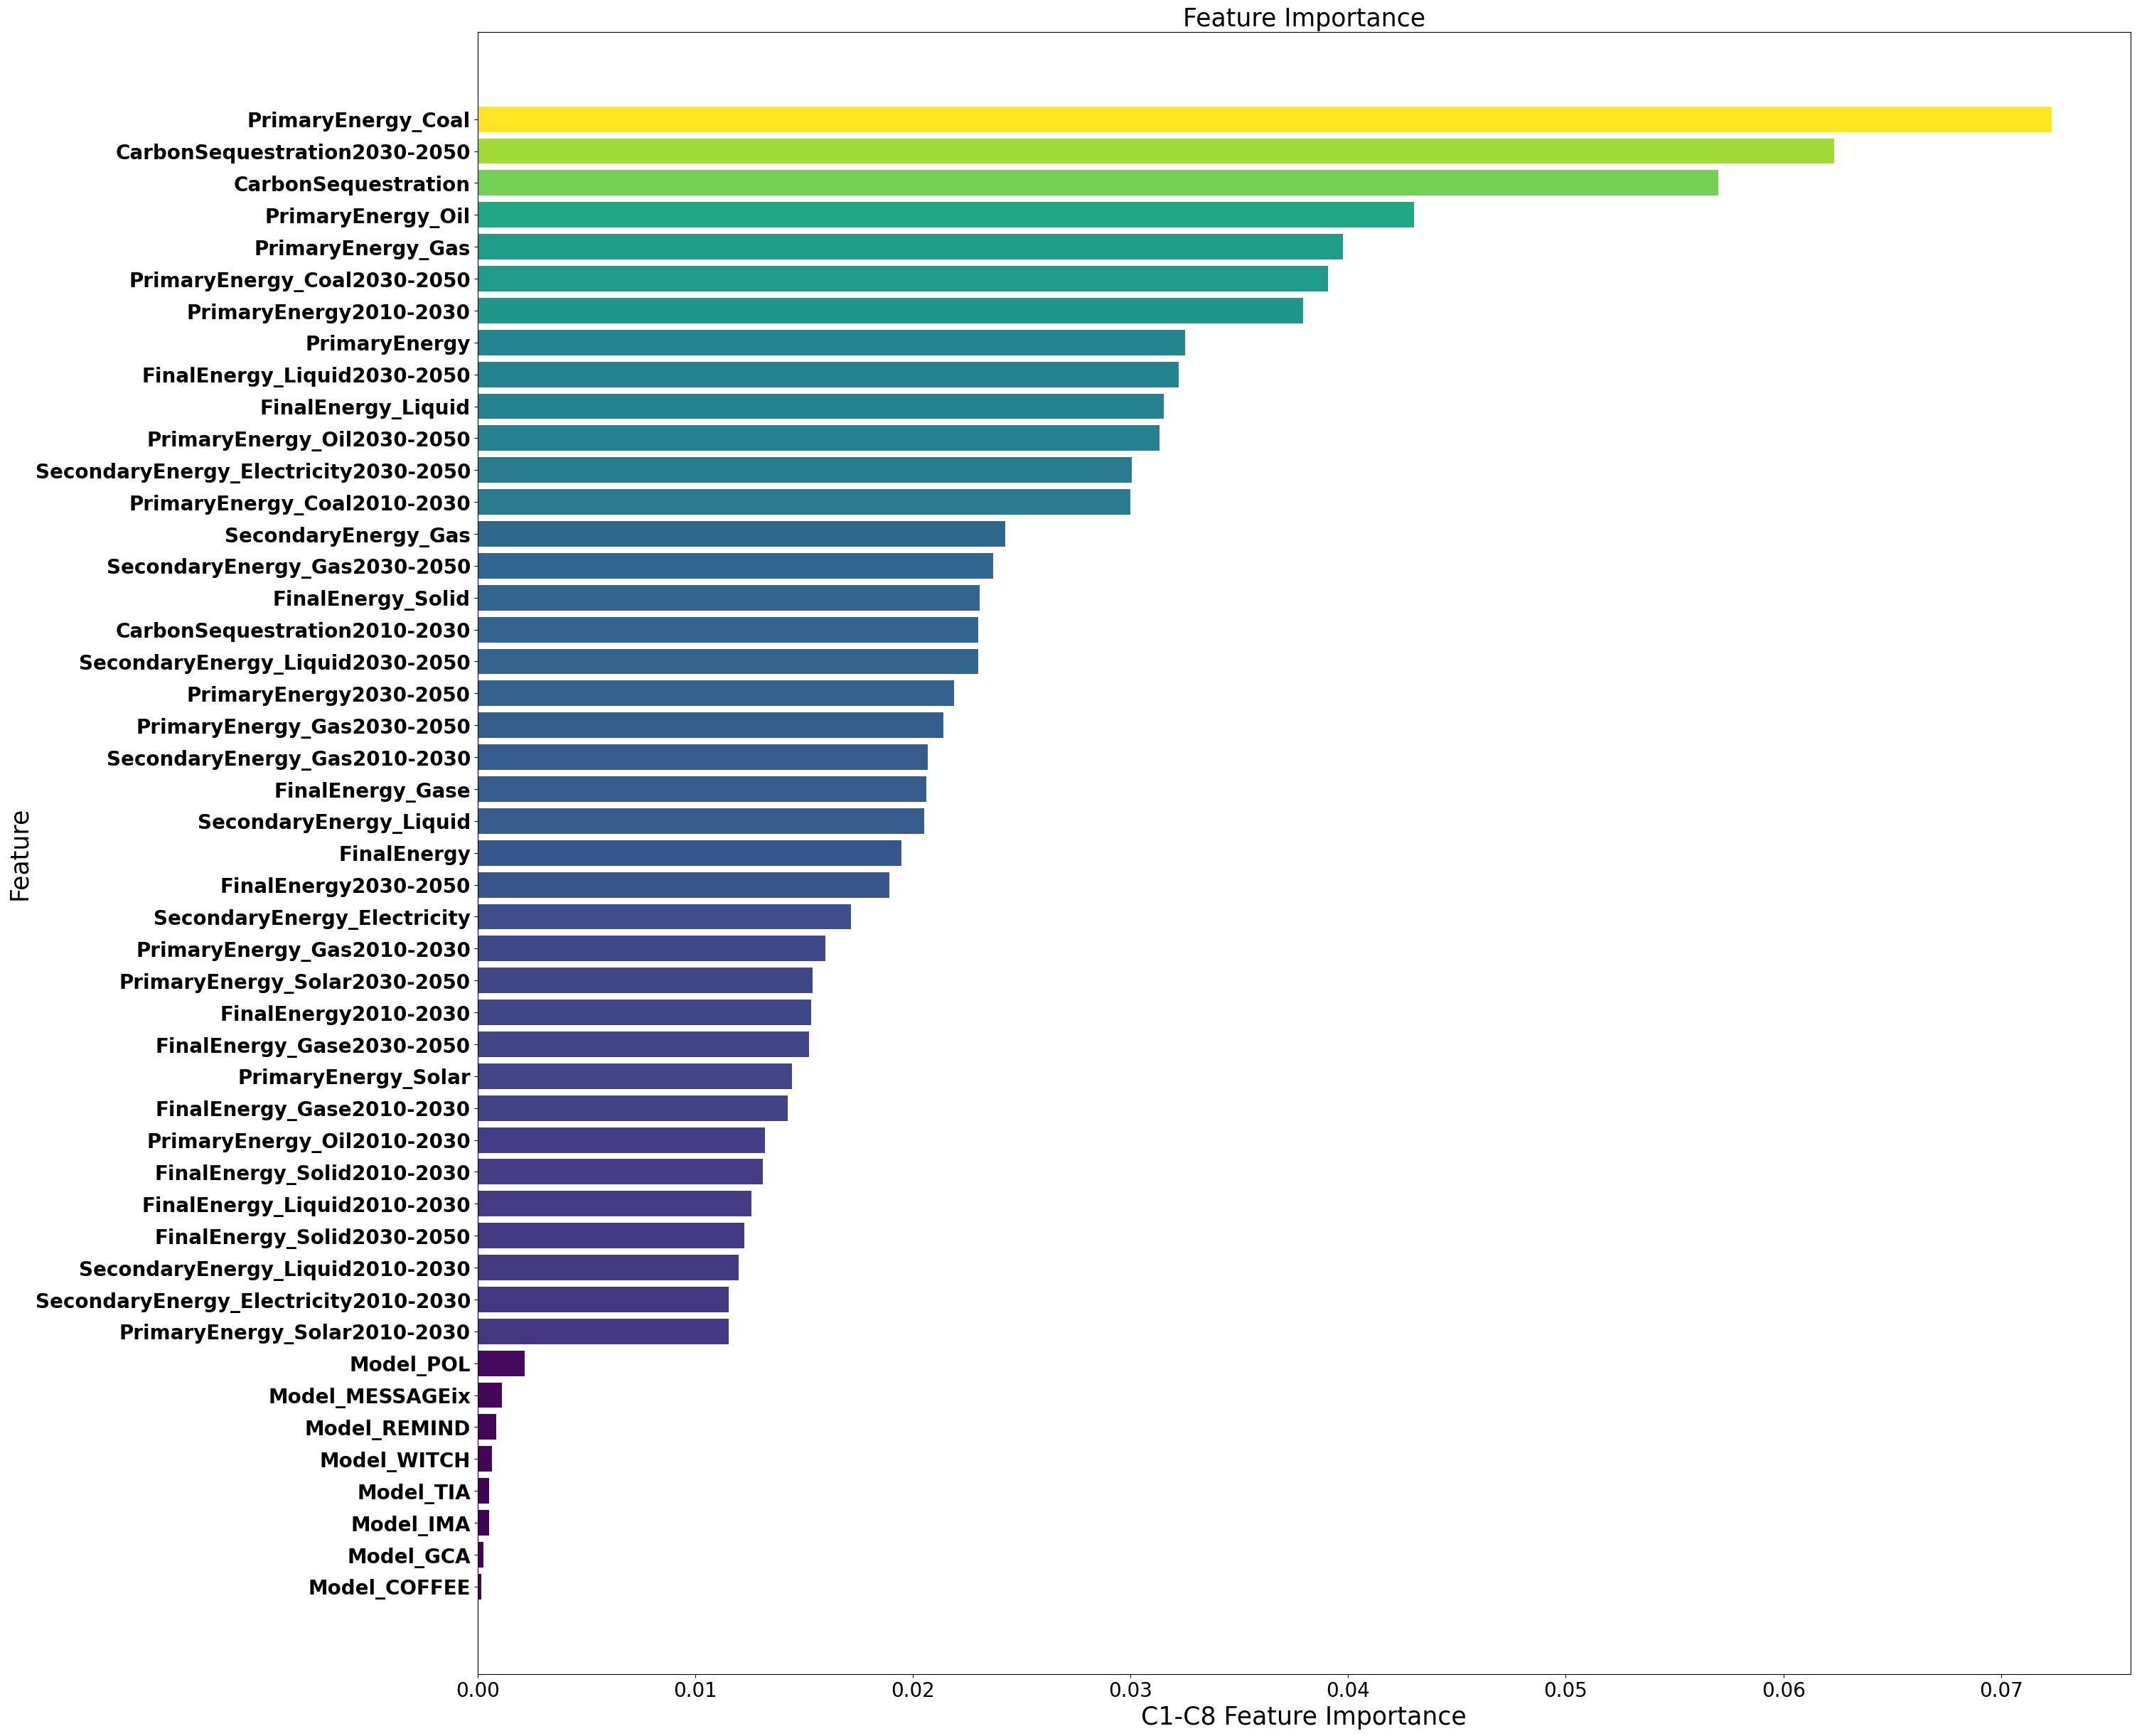

In [18]:
plt.figure(figsize=(30, 30))
sorted_df = feature_importance_df.sort_values(by='Importance', ascending=True)
colors = plt.cm.viridis(sorted_df['Importance'] / np.max(sorted_df['Importance']))
plt.barh(sorted_df['Feature'], sorted_df['Importance'],color = colors)
plt.xlabel('C1-C8 Feature Importance',fontsize=25)
plt.ylabel('Feature',fontsize=25)
plt.title('Feature Importance',fontsize=25)
plt.yticks(fontsize=20,weight='bold')
plt.xticks(fontsize=20)
plt.savefig('Figure S3(b).pdf',format='pdf',bbox_inches='tight')
plt.show()

In [19]:
Importance_of_2010_2030 = []
Importance_of_2030_2050 = []
Importance_of_Sum = []
Importance_of_Model = []
for i in range(feature_importance_df.shape[0]):
    if '2010-2030' in feature_importance_df.iloc[i]['Feature']:
        Importance_of_2010_2030.append(feature_importance_df.iloc[i]['Importance'])
    elif '2030-2050' in feature_importance_df.iloc[i]['Feature']:
        Importance_of_2030_2050.append(feature_importance_df.iloc[i]['Importance'])
    elif 'Model'in feature_importance_df.iloc[i]['Feature']:
        Importance_of_Model.append(feature_importance_df.iloc[i]['Importance'])
    else:
        Importance_of_Sum.append(feature_importance_df.iloc[i]['Importance'])


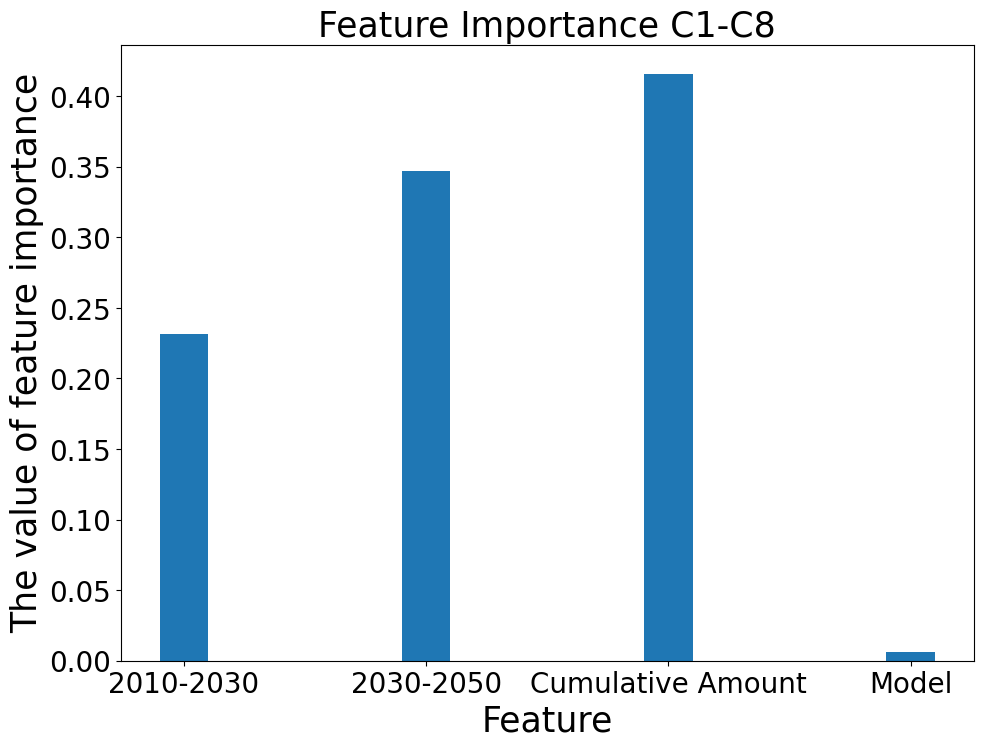

In [20]:
#2010-2030, 2030-2050, Accumulation, Model Four-part Comparison of Feature Importance
plt.figure(figsize=(11,8))
plt.bar(['2010-2030','2030-2050','Cumulative Amount','Model'], [sum(Importance_of_2010_2030),sum(Importance_of_2030_2050),sum(Importance_of_Sum),sum(Importance_of_Model)],width=0.2)
plt.xlabel('Feature',fontsize=25)
plt.ylabel('The value of feature importance',fontsize=25)
plt.title('Feature Importance C1-C8',fontsize=25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.savefig('Figure S4(b).pdf',format='pdf',bbox_inches='tight')
plt.show()

In [21]:
#Aggregate the categories and then train the random forest model
mapping = {1:1,2:1,3:1,4:1,5:2,6:2,7:3,8:3}
DataSet['Category'].replace(mapping,inplace=True)

In [22]:
X = DataSet.drop(columns='Category')
y = DataSet['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

#Create random forest classifier object
classifier2 = RandomForestClassifier(random_state=8)

# GridSearch and Fitting Model
parameters_2 = {
    'n_estimators':[10,100,500,1000,3000],
    'max_depth':[5,7,8,10,12,14],
    'min_samples_split':[4,6,8]
}

# GridSearch and Fitting model
grid_search2 = GridSearchCV(classifier2,parameters_2,cv=3,n_jobs=-1,verbose=2)
grid_search2.fit(X_train,y_train)
print(f"Best paramters:")
print(grid_search2.best_params_)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
Best paramters:
{'max_depth': 10, 'min_samples_split': 8, 'n_estimators': 1000}


In [23]:
rf_classifier2 = RandomForestClassifier(n_estimators=1000,max_depth=10,min_samples_split=8,random_state=8)
rf_classifier2.fit(X_train, y_train)
y_pred = rf_classifier2.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Classification accuracy on training datasets:", accuracy)

Classification accuracy on training datasets: 0.9974874371859297


In [24]:
# Predict on test data
y_pred = rf_classifier2.predict(X_test)

# Calculate classification accuracy
accuracy = accuracy_score(y_test, y_pred)
print("classification accuracy:", accuracy)

classification accuracy: 0.955


In [25]:
#Feature Importance
importance = rf_classifier2.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print(feature_importance_df)
#The importance score of each feature is ranked from largest to smallest

                                 Feature  Importance
26          CarbonSequestration2030-2050    0.118020
6                     PrimaryEnergy_Coal    0.099225
0                    CarbonSequestration    0.082750
8                      PrimaryEnergy_Oil    0.057399
7                      PrimaryEnergy_Gas    0.053099
29           FinalEnergy_Liquid2030-2050    0.043171
32           PrimaryEnergy_Coal2030-2050    0.042475
18                PrimaryEnergy2010-2030    0.042428
34            PrimaryEnergy_Oil2030-2050    0.040239
3                     FinalEnergy_Liquid    0.037460
19           PrimaryEnergy_Coal2010-2030    0.036879
33            PrimaryEnergy_Gas2030-2050    0.029676
5                          PrimaryEnergy    0.029513
37          SecondaryEnergy_Gas2030-2050    0.029438
31                PrimaryEnergy2030-2050    0.022081
38       SecondaryEnergy_Liquid2030-2050    0.020775
11                   SecondaryEnergy_Gas    0.019303
13          CarbonSequestration2010-2030    0.

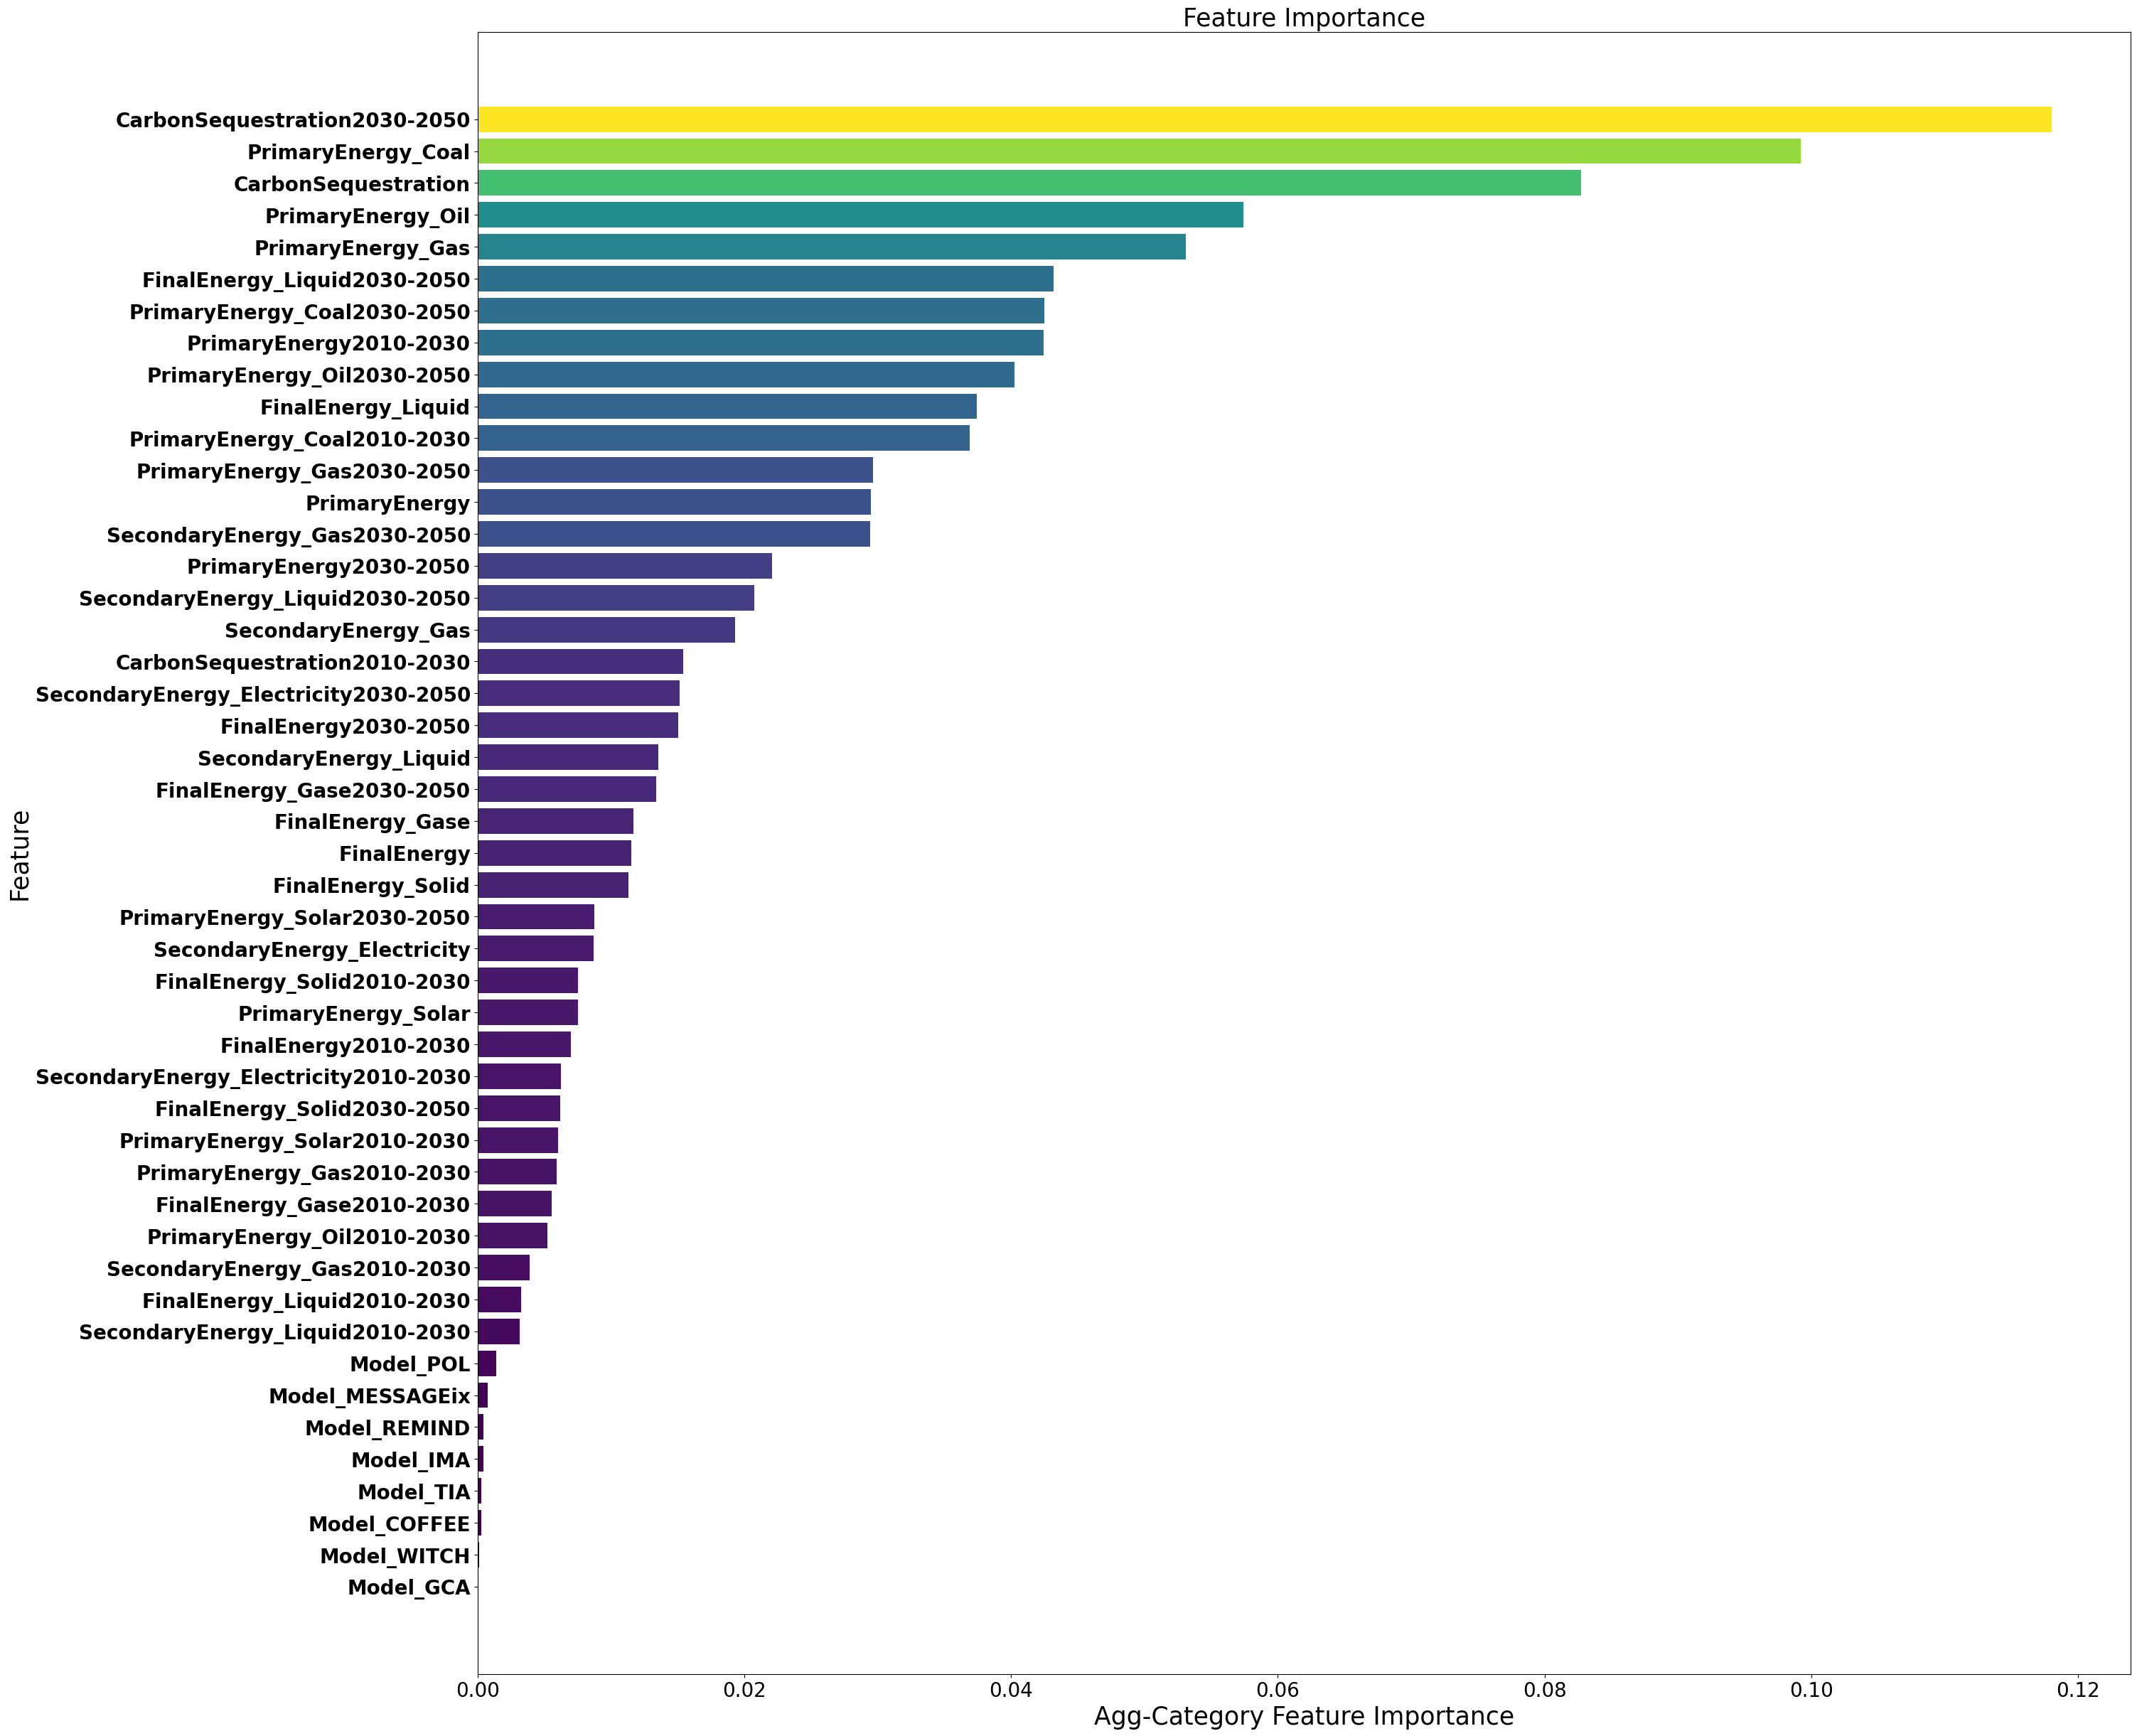

In [26]:
plt.figure(figsize=(30, 30))
sorted_df = feature_importance_df.sort_values(by='Importance', ascending=True)
colors = plt.cm.viridis(sorted_df['Importance'] / np.max(sorted_df['Importance']))
plt.barh(sorted_df['Feature'], sorted_df['Importance'],color = colors)
plt.xlabel('Agg-Category Feature Importance',fontsize=25)
plt.ylabel('Feature',fontsize=25)
plt.title('Feature Importance',fontsize=25)
plt.yticks(fontsize=20,weight='bold')
plt.xticks(fontsize=20)
plt.savefig('Figure S3(a).pdf',format='pdf',bbox_inches='tight')
plt.show()

In [27]:
Importance_of_2010_2030 = []
Importance_of_2030_2050 = []
Importance_of_Sum = []
Importance_of_Model = []
for i in range(feature_importance_df.shape[0]):
    if '2010-2030' in feature_importance_df.iloc[i]['Feature']:
        Importance_of_2010_2030.append(feature_importance_df.iloc[i]['Importance'])
    elif '2030-2050' in feature_importance_df.iloc[i]['Feature']:
        Importance_of_2030_2050.append(feature_importance_df.iloc[i]['Importance'])
    elif 'Model'in feature_importance_df.iloc[i]['Feature']:
        Importance_of_Model.append(feature_importance_df.iloc[i]['Importance'])
    else:
        Importance_of_Sum.append(feature_importance_df.iloc[i]['Importance'])

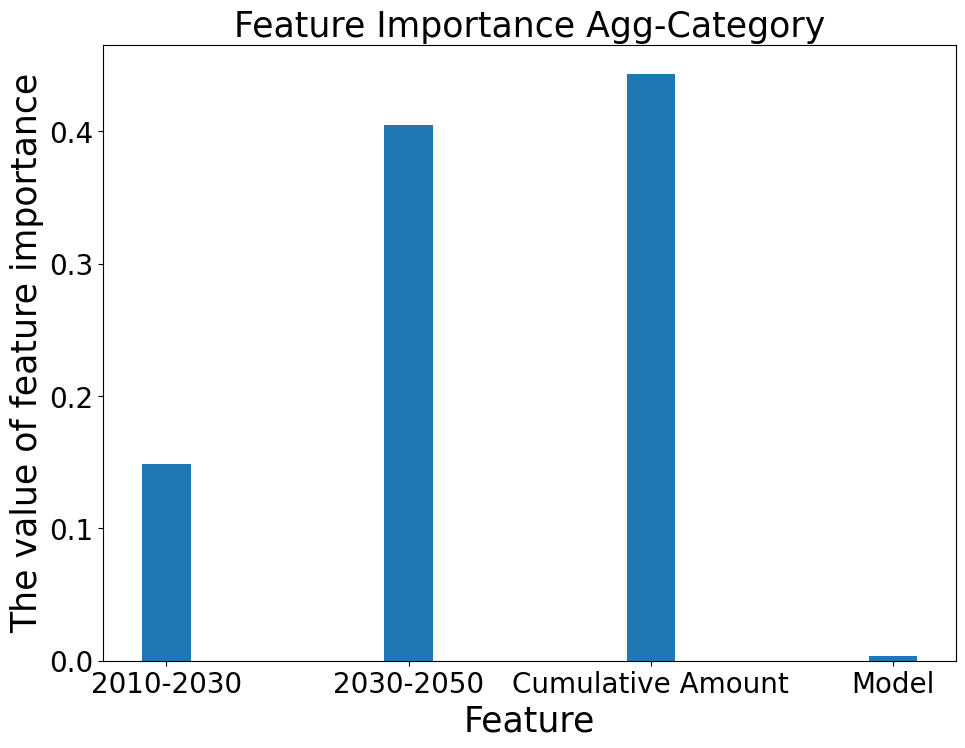

In [28]:
#2010-2030, 2030-2050, Accumulation, Model Four-part Comparison of Feature Importance
plt.figure(figsize=(11,8))
plt.bar(['2010-2030','2030-2050','Cumulative Amount','Model'], [sum(Importance_of_2010_2030),sum(Importance_of_2030_2050),sum(Importance_of_Sum),sum(Importance_of_Model)],width=0.2)
plt.xlabel('Feature',fontsize=25)
plt.ylabel('The value of feature importance',fontsize=25)
plt.title('Feature Importance Agg-Category',fontsize=25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.savefig('Figure S4(a).pdf',format='pdf',bbox_inches='tight')
plt.show()